# Data preparation


In [1]:
%cd "/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation End to End Case Study E-Commerce Analytics Project"

/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation End to End Case Study E-Commerce Analytics Project


In [2]:
import warnings
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove warnings
warnings.filterwarnings('ignore')

In [3]:
customers = pd.read_csv('CUSTOMERS.csv')
geo_location = pd.read_csv('GEO_LOCATION.csv')
items = pd.read_csv('ORDER_ITEMS.csv')
order_pay = pd.read_csv('ORDER_PAYMENTS.csv')
order_reviews = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders = pd.read_csv('ORDERS.csv')
products = pd.read_csv('PRODUCTS.csv')
sellers = pd.read_csv('SELLERS.csv')

In [4]:
# All column names and data types are appropriate

In [5]:
# changing all date related columns to date time data type
orders[[
    'order_purchase_timestamp'
]] = orders[[
    'order_purchase_timestamp'
]].apply(pd.to_datetime)

In [6]:
train = orders.merge(order_pay, on='order_id')
train = train.merge(customers, on='customer_id', how='left')
train = train.merge(items, on='order_id', how='left')
train = train.merge(products, on='product_id', how='left')
train = train.merge(sellers, on='seller_id', how='left')
train = train.merge(order_reviews, on='order_id', how='left')

In [7]:
train['Month_of_Purchase'] = pd.DataFrame(
    train.order_purchase_timestamp.dt.strftime('%Y-%m(%B)'))

In [8]:
train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,Month_of_Purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/02/17 11:07,10/04/17 19:55,10/10/17 21:25,10/18/2017 0:00,1,credit_card,...,8.0,13.0,9350.0,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/17 0:00,10/12/17 3:43,2017-10(October)
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/02/17 11:07,10/04/17 19:55,10/10/17 21:25,10/18/2017 0:00,3,voucher,...,8.0,13.0,9350.0,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/17 0:00,10/12/17 3:43,2017-10(October)
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/02/17 11:07,10/04/17 19:55,10/10/17 21:25,10/18/2017 0:00,2,voucher,...,8.0,13.0,9350.0,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/17 0:00,10/12/17 3:43,2017-10(October)
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,08/07/18 15:27,8/13/2018 0:00,1,UPI,...,13.0,19.0,31570.0,Anantapur,Andhra Pradesh,8d5266042046a06655c8db133d120ba5,4,08/08/18 0:00,08/08/18 18:37,2018-07(July)
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,08/08/18 8:55,08/08/18 13:50,8/17/2018 18:06,09/04/18 0:00,1,credit_card,...,19.0,21.0,14840.0,Freelandgunj,Gujarat,e73b67b67587f7644d5bd1a52deb1b01,5,8/18/2018 0:00,8/22/2018 19:07,2018-08(August)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119148 non-null  object        
 1   customer_id                    119148 non-null  object        
 2   order_status                   119148 non-null  object        
 3   order_purchase_timestamp       119148 non-null  datetime64[ns]
 4   order_approved_at              118971 non-null  object        
 5   order_delivered_carrier_date   117062 non-null  object        
 6   order_delivered_customer_date  115727 non-null  object        
 7   order_estimated_delivery_date  119148 non-null  object        
 8   payment_sequential             119148 non-null  int64         
 9   payment_type                   119148 non-null  object        
 10  payment_installments           119148 non-null  int64         
 11  

In [10]:
# NaN values in the data
train.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2567
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weig

In [11]:
# Dropping the columns which are not needed for analysis

train.drop(columns=['order_approved_at',

                    'order_delivered_carrier_date',

                    'order_delivered_customer_date',

                    'order_estimated_delivery_date',

                    'shipping_limit_date',

                    'product_name_lenght',

                    'product_description_lenght',

                    'product_photos_qty',

                    'product_weight_g',

                    'product_length_cm',

                    'product_height_cm',

                    'product_width_cm',

                    'seller_zip_code_prefix',

                    'seller_city',

                    'seller_state', 'review_creation_date',

                    'review_answer_timestamp'], inplace=True)

In [12]:
train.isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
payment_sequential             0
payment_type                   0
payment_installments           0
payment_value                  0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_item_id                833
product_id                   833
seller_id                    833
price                        833
freight_value                833
product_category_name       2567
review_id                      0
review_score                   0
Month_of_Purchase              0
dtype: int64

In [13]:
train['order_item_id'] = train['order_item_id'].fillna(
    train['order_item_id'].median())

In [14]:
col = ['product_id', 'seller_id', 'product_category_name']
for i in col:
    train[i] = train[i].fillna('unknown')

In [15]:
# considering 90 percent of  payment value as price and 10 percent as freight_value
train['price'] = train['price'].fillna(0.90*(train.payment_value))

In [16]:
train['freight_value'] = train['freight_value'].fillna(
    0.1*(train.payment_value))

In [17]:
train.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
review_id                   0
review_score                0
Month_of_Purchase           0
dtype: int64

In [18]:
train.shape

(119148, 21)

In [19]:
#train_profile = ProfileReport(df=train)
# train_profile.to_file('train_profile.html')

# 1.EDA

In [20]:
# 1.Total Revenue is defined as the total of price paid by the Customers.
Total_Revenue = items.price.sum()

# 2.Total Quantity

Total_Orders = items.value_counts().count()

# 3.TotalProducts

TotalProducts = products.value_counts().count()

# Total sellers

Total_Sellers = sellers.value_counts().count()

Total_Sellers
# Total locations,
TotalLocations = geo_location.value_counts().count()

# Total channels,

# Total payment methods
TotalPaymentMethods = order_pay.payment_type.value_counts().count()

print('Total_Revenue=', Total_Revenue, '\nTotal_Orders=', Total_Orders,
      '\nTotalProducts=', TotalProducts, '\nTotal_Sellers=', Total_Sellers,
      '\nTotalLocations=', TotalLocations, '\nTotalPaymentMethods=',
      TotalPaymentMethods)

Total_Revenue= 13591643.700000003 
Total_Orders= 112650 
TotalProducts= 32327 
Total_Sellers= 3038 
TotalLocations= 19015 
TotalPaymentMethods= 5


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB



**b. Understanding how many new customers acquired every month**

In [22]:
cust_no = pd.crosstab(train.customer_unique_id,
                      train.Month_of_Purchase).sum()

In [23]:
ind = len(cust_no.index)
new_cust = [i for i in range(0, ind)]

In [24]:
for i in range(1, ind):
    new_cust[i] = cust_no[i] - cust_no[i - 1]

In [25]:
newcust = pd.Series(new_cust, index=cust_no.index)

In [26]:
old_cust = [i for i in range(0, ind)]

In [27]:
for i in range(1, ind):
    old_cust[i] = cust_no[i - 1]

In [28]:
oldcust = pd.Series(old_cust, index=cust_no.index)

In [29]:
cust_no = pd.DataFrame(cust_no)

In [30]:
cust_no['newcust'] = newcust
cust_no['oldcust'] = oldcust

In [31]:
cust_no.rename(columns={0: 'Total_Customers', 'newcust': 'New_Customers',
               'oldcust': 'Old_Customers'}, inplace=True)
print('\t\t\tTrend in Customer Numbers\n\n', cust_no)

			Trend in Customer Numbers

                     Total_Customers  New_Customers  Old_Customers
Month_of_Purchase                                                
2016-09(September)                4              0              0
2016-10(October)                402            398              4
2016-12(December)                 1           -401            402
2017-01(January)               1035           1034              1
2017-02(February)              2123           1088           1035
2017-03(March)                 3243           1120           2123
2017-04(April)                 2878           -365           3243
2017-05(May)                   4485           1607           2878
2017-06(June)                  3853           -632           4485
2017-07(July)                  4949           1096           3853
2017-08(August)                5278            329           4949
2017-09(September)             5187            -91           5278
2017-10(October)               5683          

In [32]:
df = train.groupby(['order_id', 'customer_unique_id']).last().reset_index()
df

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,...,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_id,review_score,Month_of_Purchase
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,1,credit_card,2,72.19,28013,...,Andhra Pradesh,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Cool_Stuff,97ca439bc427b48bc1cd7177abe71365,5,2017-09(September)
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,1,credit_card,3,259.83,15775,...,Chhattisgarh,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Pet_Shop,7b07bacd811c4117b742569b04ce3580,4,2017-04(April)
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,1,credit_card,5,216.87,35661,...,Chhattisgarh,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Furniture_Decor,0c5b33dea94867d1ac402749e5438e8b,5,2018-01(January)
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,1,credit_card,2,25.78,12952,...,Andhra Pradesh,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Perfumery,f4028d019cb58564807486a6aaf33817,4,2018-08(August)
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,1,credit_card,3,218.04,13226,...,Kerala,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Garden_Tools,940144190dcba6351888cafa43f3a3a5,5,2017-02(February)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:00,1,UPI,1,343.40,65077,...,Andhra Pradesh,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,Housewares,9185f849f32d82e216a4e025e0c50f5c,5,2018-04(April)
99436,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:00,1,UPI,1,386.53,81690,...,Andhra Pradesh,1.0,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,Computers_Accessories,be803f6a93d64719fd685c1cc610918a,5,2018-07(July)
99437,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:00,1,credit_card,3,116.85,4039,...,Andhra Pradesh,1.0,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,Sports_Leisure,dbdd81cd59a1a9f94a10a990b4d48dce,5,2017-10(October)
99438,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:00,1,credit_card,3,64.71,13289,...,Andhra Pradesh,1.0,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,Computers_Accessories,fba117c9ac40d41ca7be54741f471303,5,2017-08(August)


In [33]:
customer_count_per_month = df.groupby(['Month_of_Purchase', df.customer_unique_id.rename(
    'customer')]).customer_unique_id.count().reset_index()

In [34]:
customer_firstpurchase = df.groupby('customer_unique_id').Month_of_Purchase.min().reset_index(
).rename(columns={'customer_unique_id': 'customer', 'Month_of_Purchase': 'first_purchase_month'})

In [35]:
df_final = pd.merge(left=customer_count_per_month,
                    right=customer_firstpurchase, on='customer')

In [36]:
df_final.customer_unique_id = np.where(
    df_final.Month_of_Purchase == df_final.first_purchase_month, 'New', 'Old')

In [37]:
new = df_final[df_final.customer_unique_id == 'New'].groupby(
    by='Month_of_Purchase').agg('count')['customer_unique_id']
print('\t\t\tNew Customers per Month\n\n', new)

			New Customers per Month

 Month_of_Purchase
2016-09(September)       3
2016-10(October)       321
2016-12(December)        1
2017-01(January)       764
2017-02(February)     1752
2017-03(March)        2636
2017-04(April)        2352
2017-05(May)          3596
2017-06(June)         3139
2017-07(July)         3894
2017-08(August)       4184
2017-09(September)    4130
2017-10(October)      4470
2017-11(November)     7304
2017-12(December)     5487
2018-01(January)      7025
2018-02(February)     6451
2018-03(March)        6965
2018-04(April)        6711
2018-05(May)          6622
2018-06(June)         5940
2018-07(July)         6071
2018-08(August)       6271
2018-09(September)       5
2018-10(October)         1
Name: customer_unique_id, dtype: int64


**c. Understand the retention of customers on month on month basis**

In [38]:
old = df_final[df_final.customer_unique_id == 'Old'].groupby(
    by='Month_of_Purchase').agg('count')['customer_unique_id']
print('\t\t\tRetention of Customers per Month\n\n', old)

			Retention of Customers per Month

 Month_of_Purchase
2017-01(January)        1
2017-02(February)       3
2017-03(March)          6
2017-04(April)         20
2017-05(May)           29
2017-06(June)          41
2017-07(July)          53
2017-08(August)        62
2017-09(September)     82
2017-10(October)       91
2017-11(November)     126
2017-12(December)     116
2018-01(January)      141
2018-02(February)     118
2018-03(March)        150
2018-04(April)        171
2018-05(May)          192
2018-06(June)         188
2018-07(July)         159
2018-08(August)       189
2018-09(September)      9
2018-10(October)        3
Name: customer_unique_id, dtype: int64


**d. How the revenues from existing/new customers on month on month basis**

In [39]:
d = train.drop_duplicates('customer_unique_id')
d.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_category_name',
       'review_id', 'review_score', 'Month_of_Purchase'],
      dtype='object')

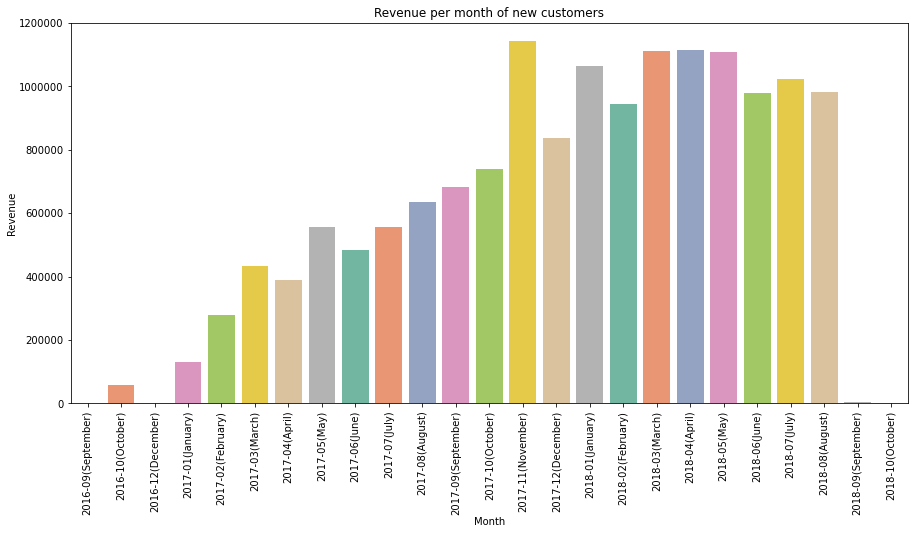

In [40]:
D = d.groupby('Month_of_Purchase').payment_value.sum().reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(D.Month_of_Purchase, D.payment_value, palette='Set2')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Revenue per month of new customers')
plt.xlabel('Month', labelpad=2)
plt.ylabel('Revenue', labelpad=2)
plt.show()

**e. Understand the trends/seasonality of sales, quantity by category, location, month,
week, day, time, channel, payment method etc...**

In [41]:
RevperM = pd.pivot_table(train,
                         index='Month_of_Purchase',
                         values='price',
                         aggfunc='sum')

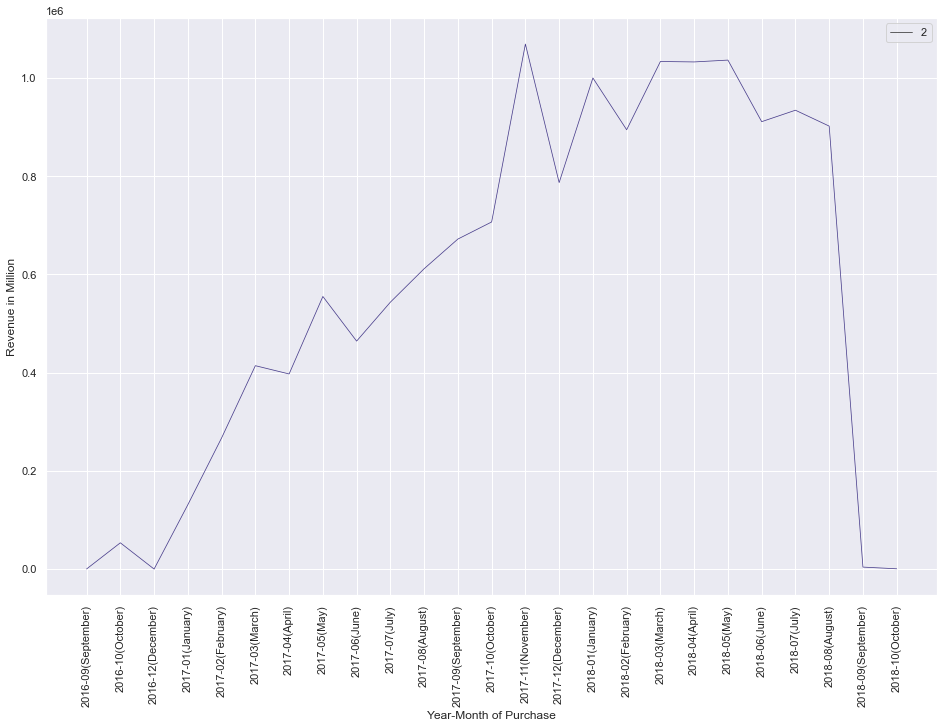

In [42]:
plt.figure(constrained_layout=True, figsize=(13, 10))
sns.set_theme(style='darkgrid', context='notebook')
fig = sns.lineplot(data=RevperM,
                   x='Month_of_Purchase',
                   y='price',
                   color='darkslateblue',
                   size=2)

plt.xticks(rotation=90)

plt.xlabel('Year-Month of Purchase')
plt.ylabel('Revenue in Million')

plt.show()

**Orders by Month, Week, Day of Week, Category, State, City**

In [43]:
qpm = pd.DataFrame(
    pd.crosstab(
        index=train.order_id,
        columns=train.Month_of_Purchase).sum()).rename(columns={0: "Quantity"})
qpm

,Quantity
Month_of_Purchase,
2016-09(September),4
2016-10(October),402
2016-12(December),1
2017-01(January),1035
2017-02(February),2123
2017-03(March),3243
2017-04(April),2878
2017-05(May),4485
2017-06(June),3853


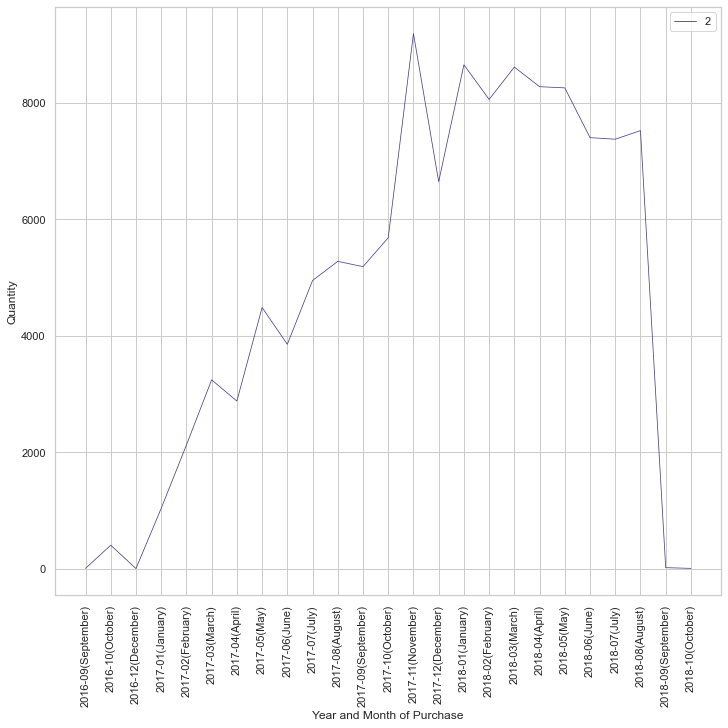

In [44]:
plt.figure(constrained_layout=True, figsize=(10, 10))
sns.set_theme(style='whitegrid', context='notebook')
fig = sns.lineplot(data=qpm,
                   x='Month_of_Purchase',
                   y='Quantity',
                   color='darkslateblue',
                   size=2)

plt.xticks(rotation=90)

plt.xlabel('Year and Month of Purchase')
plt.ylabel('Quantity')

plt.show()

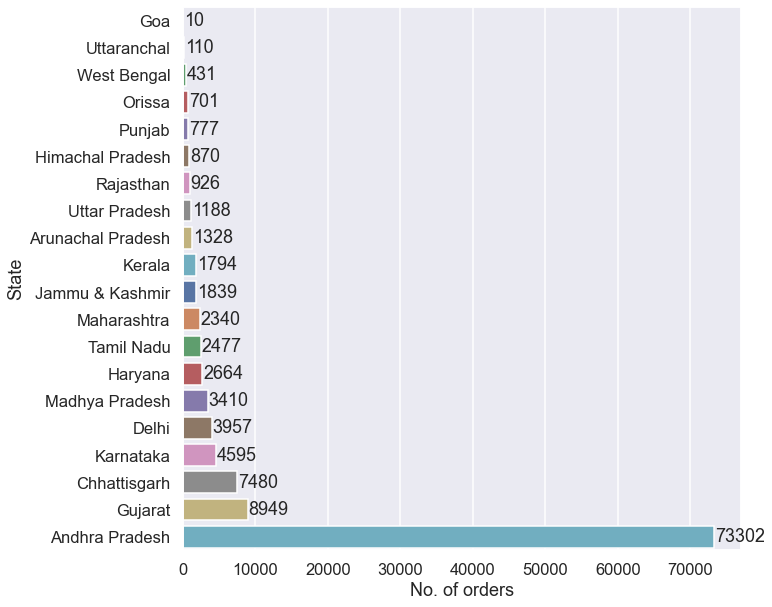

In [45]:
train['Qty'] = 1
df1 = pd.pivot_table(data=train,
                     index='customer_state',
                     values='Qty',
                     aggfunc='sum').reset_index().sort_values(by='Qty')
plt.figure(figsize=(10, 10))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.barplot(data=df1, y='customer_state', x='Qty', palette='deep')
ax.bar_label(ax.containers[0], padding=1)
plt.ylabel('State')
plt.xlabel('No. of orders')
plt.show()

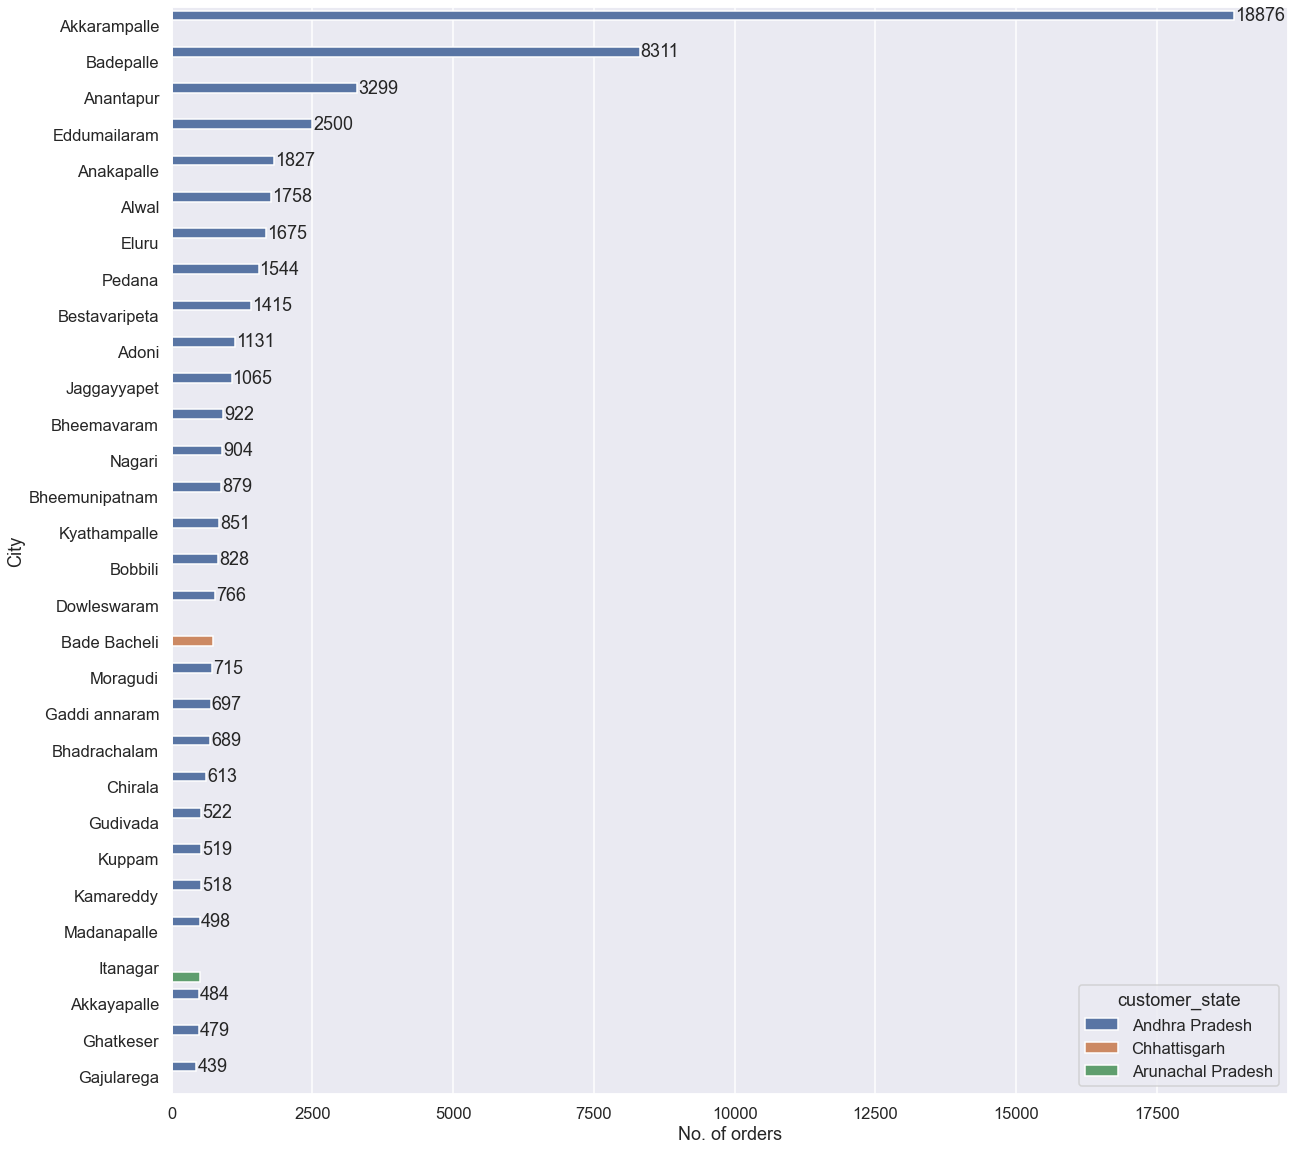

In [46]:
df2 = pd.pivot_table(data=train,
                     index=['customer_city', 'customer_state'],
                     values='Qty',
                     aggfunc='sum').reset_index().sort_values(by='Qty',
                                                              ascending=False)
plt.figure(figsize=(20, 20))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.barplot(data=df2.head(30),
                 y='customer_city',
                 x='Qty',
                 palette='deep',
                 hue='customer_state')
ax.bar_label(ax.containers[0], padding=1)
plt.ylabel('City')
plt.xlabel('No. of orders')
plt.show()

In [47]:
print('Top 20\n\n', df2.head(20), '\n\nBottom 20\n\n', df2.tail(20))

Top 20

        customer_city  customer_state    Qty
55      Akkarampalle  Andhra Pradesh  18876
284        Badepalle  Andhra Pradesh   8311
148        Anantapur  Andhra Pradesh   3299
1099    Eddumailaram  Andhra Pradesh   2500
142       Anakapalle  Andhra Pradesh   1827
93             Alwal  Andhra Pradesh   1758
1111           Eluru  Andhra Pradesh   1675
2963          Pedana  Andhra Pradesh   1544
493    Bestavaripeta  Andhra Pradesh   1415
22             Adoni  Andhra Pradesh   1131
1492     Jaggayyapet  Andhra Pradesh   1065
552      Bheemavaram  Andhra Pradesh    922
2581          Nagari  Andhra Pradesh    904
553   Bheemunipatnam  Andhra Pradesh    879
2160    Kyathampalle  Andhra Pradesh    851
650          Bobbili  Andhra Pradesh    828
1074     Dowleswaram  Andhra Pradesh    766
283     Bade Bacheli    Chhattisgarh    744
2482        Moragudi  Andhra Pradesh    715
1167   Gaddi annaram  Andhra Pradesh    697 

Bottom 20

        customer_city customer_state  Qty
90          

In [48]:
df2[df2.Qty <= 5]

,customer_city,customer_state,Qty
1712,Kanam,Tamil Nadu,5
3154,Rajauri,Jammu & Kashmir,5
2911,Parlakhemundi,Orissa,5
3915,Uri,Jammu & Kashmir,5
256,Azhikode North,Kerala,5
...,...,...,...
3348,Sandi,Uttar Pradesh,1
2651,Naravarikuppam,Tamil Nadu,1
2649,Narauli,Uttar Pradesh,1
267,Babina,Uttar Pradesh,1


In [49]:
# Orders by state
pd.DataFrame(
    pd.crosstab(index=train.order_id, columns=train.customer_state).sum())

,0
customer_state,
Andhra Pradesh,73302
Arunachal Pradesh,1328
Chhattisgarh,7480
Delhi,3957
Goa,10
Gujarat,8949
Haryana,2664
Himachal Pradesh,870
Jammu & Kashmir,1839


In [50]:
# Orders by category
df3 = pd.pivot_table(data=train,
                     index='product_category_name',
                     values='Qty',
                     aggfunc='sum').sort_values(by='Qty', ascending=False)

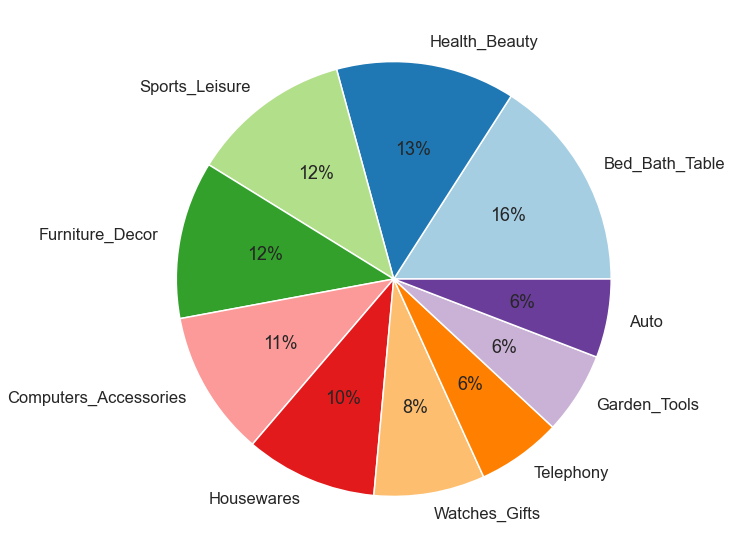

In [51]:
plt.figure(figsize=(10, 10))
custom = sns.color_palette('Paired', 10)
plt.pie(x=df3.head(10).Qty,
        labels=df3.head(10).index,
        autopct='%.0f%%',
        colors=custom)
plt.show()

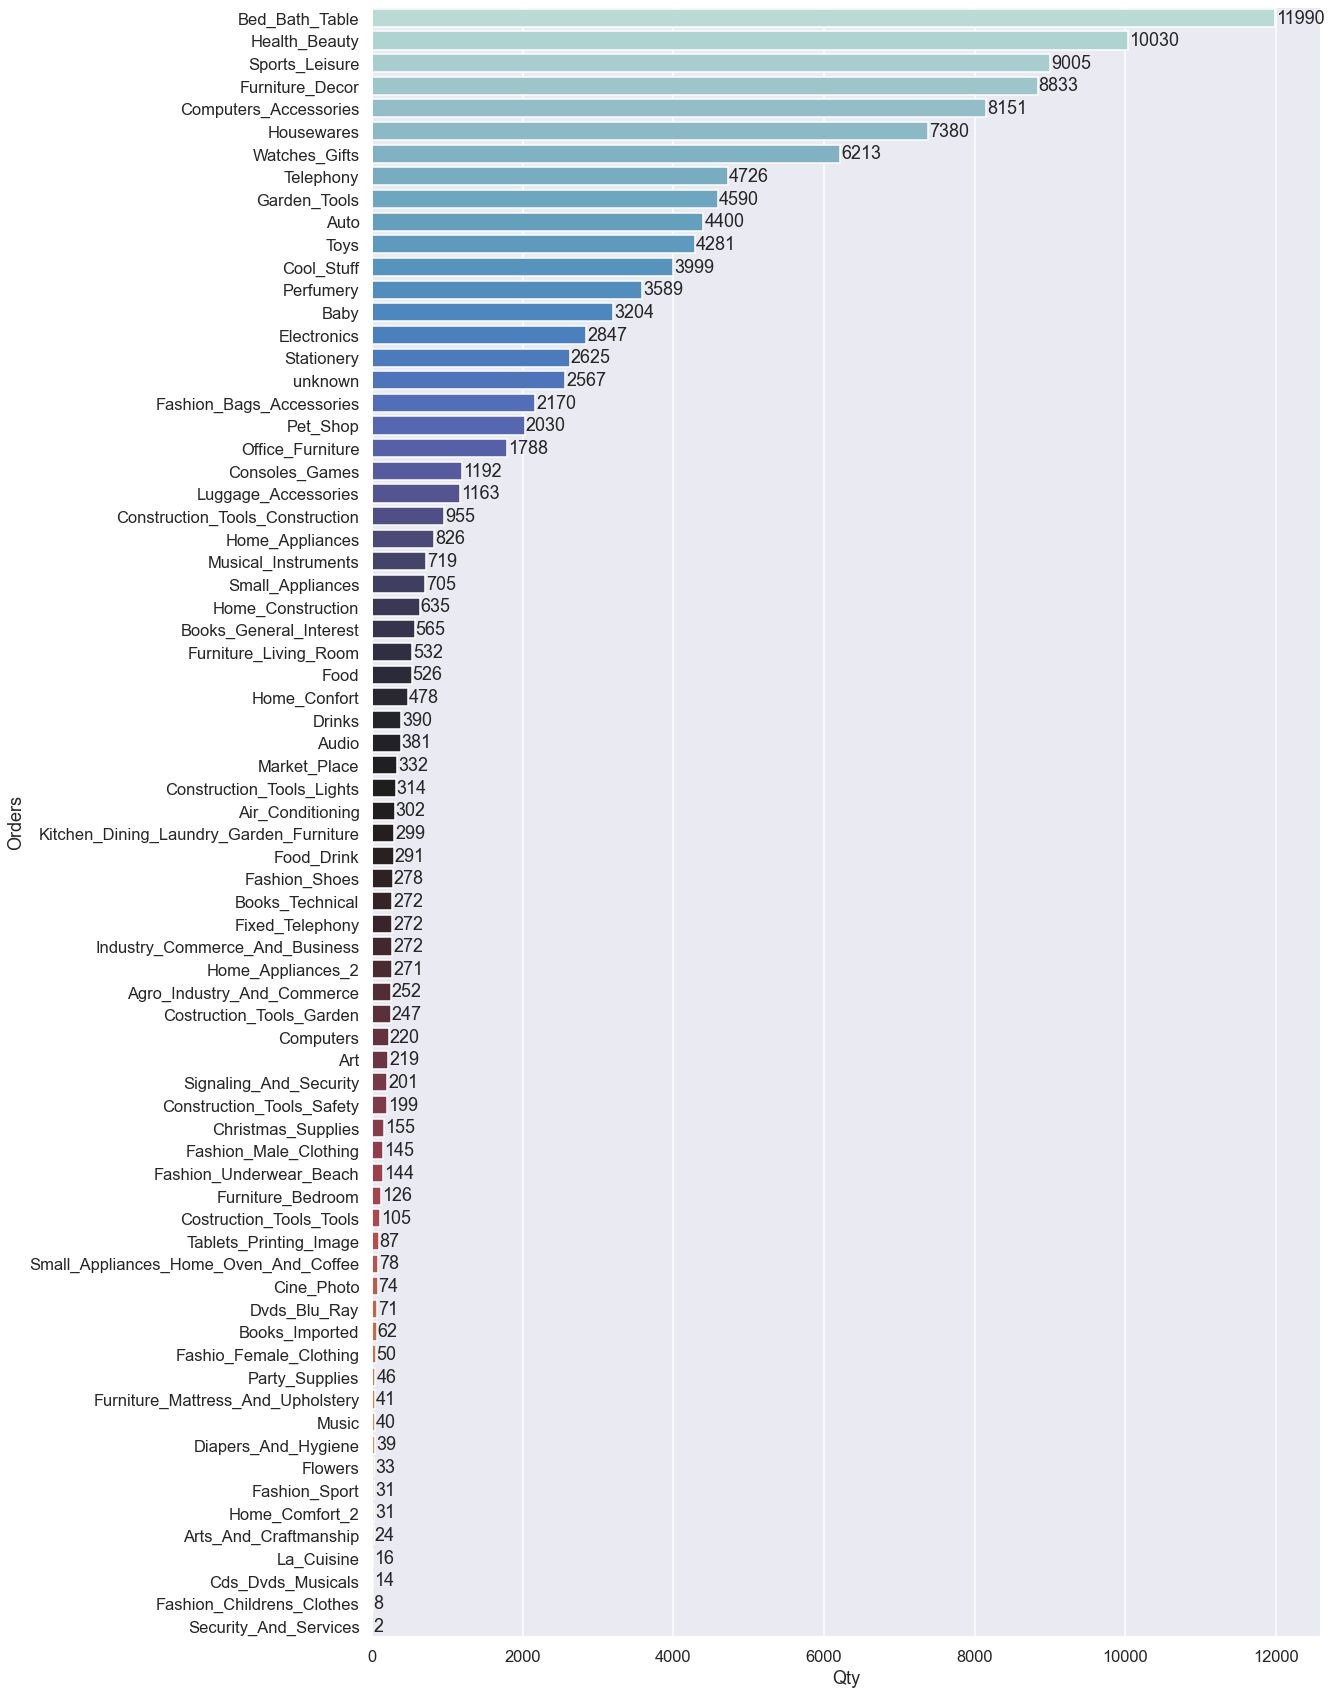

In [52]:
plt.figure(figsize=(17, 30))
custom_palette = sns.color_palette('icefire', 70)
ax = sns.barplot(y=df3.index, x=df3.Qty, palette=custom_palette)
plt.ylabel('Product Category')
plt.ylabel('Orders')
ax.bar_label(ax.containers[0], padding=1)
plt.show()

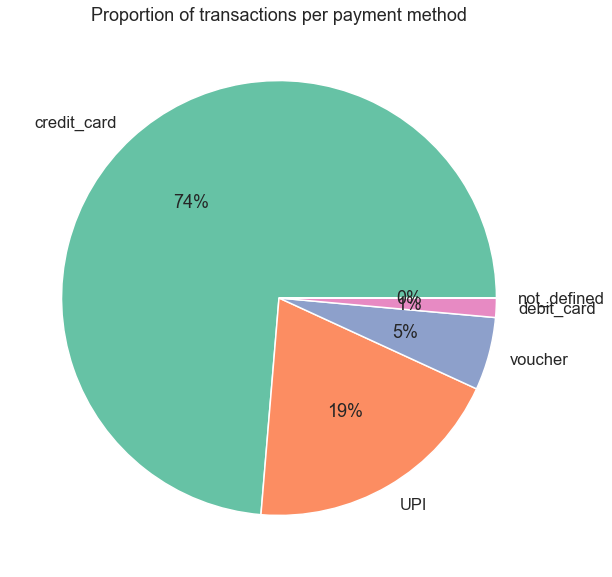

In [53]:
plt.figure(figsize=(10, 10))
custom = sns.color_palette('Set2')
ax = plt.pie(x=train.payment_type.value_counts(),
             labels=train.payment_type.value_counts().index,
             autopct='%0.f%%',
             colors=custom)
plt.title('Proportion of transactions per payment method')
plt.show()

In [54]:
paydf = pd.pivot_table(data=train,
                       columns='payment_type',
                       values='Qty',
                       index='Month_of_Purchase',
                       aggfunc='sum')
paydf.fillna(0, inplace=True)

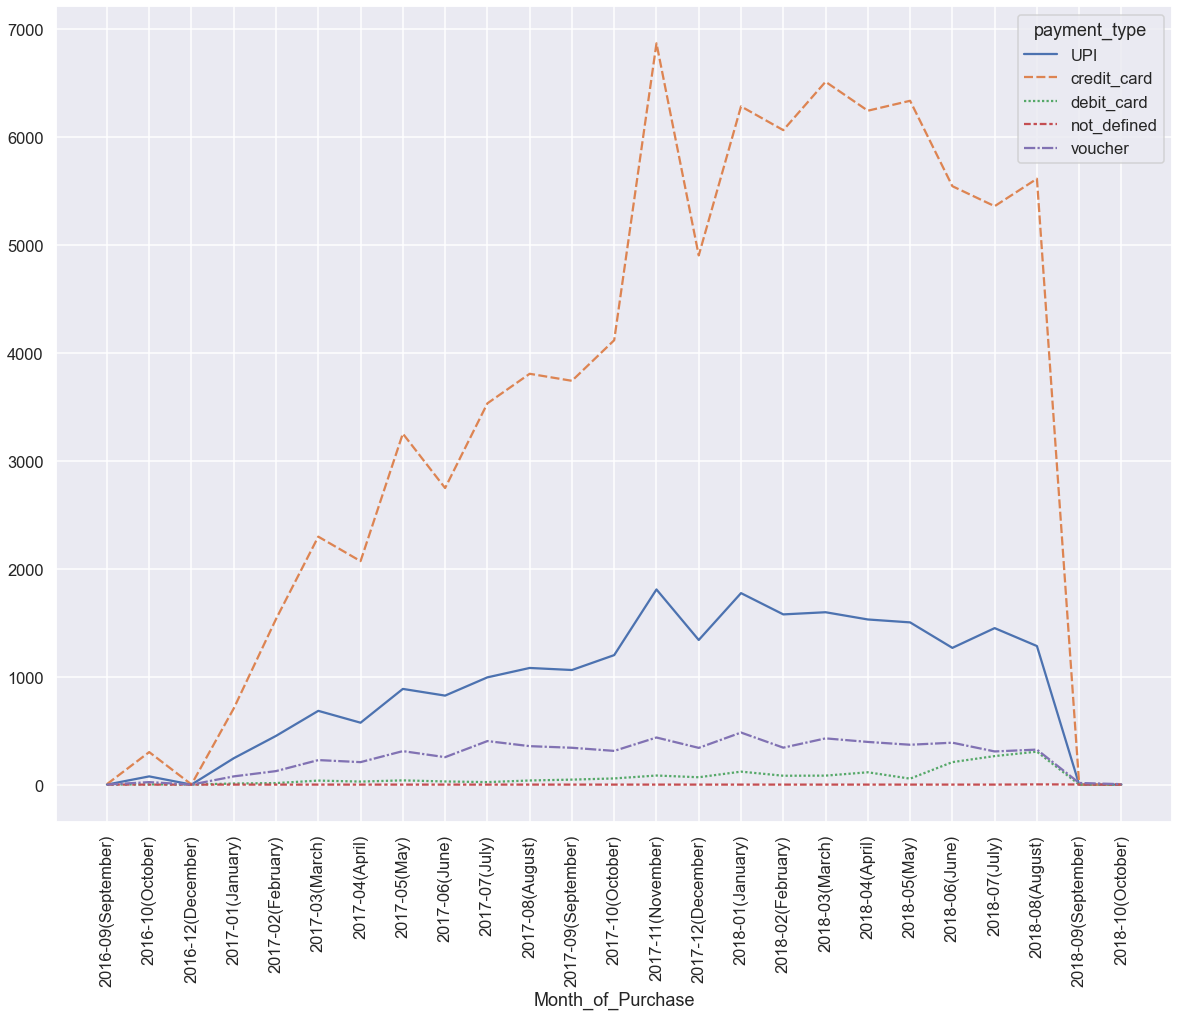

In [55]:
plt.figure(figsize=(20, 15))

ax = sns.lineplot(data=paydf)
plt.xticks(rotation=90)
plt.show()

**f. Popular Products by month, seller, state, category.**

In [56]:
df = pd.pivot_table(
    data=train,
    index=[train.order_purchase_timestamp.dt.month, 'product_id'],
    values='Qty',
    aggfunc='sum').sort_values(
        by=['order_purchase_timestamp', 'Qty']).sort_values(
            by=['order_purchase_timestamp', 'Qty'],
            ascending=[True, False
                       ]).reset_index().rename(columns={
                           'order_purchase_timestamp': 'Month',
                           'Qty': 'Orders'
                       })

df['r'] = df.groupby(by='Month')['Month'].rank(method='first')
df[df.r <= 5]

,Month,product_id,Orders,r
0,1,aca2eb7d00ea1a7b8ebd4e68314663af,124,1.0
1,1,54d9ac713e253fa1fae9c8003b011c2a,78,2.0
2,1,unknown,64,3.0
3,1,36f60d45225e60c7da4558b070ce4b60,63,4.0
4,1,d1c427060a0f73f6b889a5c7c61f2ac4,45,5.0
4640,2,unknown,85,1.0
4641,2,3dd2a17168ec895c781a9191c1e95ad7,72,2.0
4642,2,e53e557d5a159f5aa2c5e995dfdf244b,72,3.0
4643,2,368c6c730842d78016ad823897a372db,50,4.0
4644,2,36f60d45225e60c7da4558b070ce4b60,50,5.0


In [57]:
# Popular products by Month

df = pd.pivot_table(
    data=train,
    index=[train.order_purchase_timestamp.dt.month, 'product_id'],
    values='Qty',
    aggfunc='sum').sort_values(
        by=['order_purchase_timestamp', 'Qty']).sort_values(
            by=['order_purchase_timestamp', 'Qty'], ascending=[True, False])

t = np.percentile(df, 99.7)
df[df.Qty > t]

Qty
order_purchase_timestamp product_id                           
1                        aca2eb7d00ea1a7b8ebd4e68314663af  124
                         54d9ac713e253fa1fae9c8003b011c2a   78
                         unknown                            64
                         36f60d45225e60c7da4558b070ce4b60   63
                         d1c427060a0f73f6b889a5c7c61f2ac4   45
...                                                        ...
12                       fb55982be901439613a95940feefd9ee   32
                         165f86fe8b799a708a20ee4ba125c289   29
                         7a10781637204d8d10485c71a6108a2e   28
                         b623b7cb05ee3248fbe4a6ecbeed79a4   28
                         c4baedd846ed09b85f78a781b522f126   28

[173 rows x 1 columns]

In [58]:
# Popular Categories by Month
df = pd.pivot_table(data=train,
                    index=[
                        train.order_purchase_timestamp.dt.strftime('%m-%b'),
                        'product_category_name'
                    ],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['order_purchase_timestamp', 'Qty']).sort_values(
                            by=['order_purchase_timestamp', 'Qty'],
                            ascending=[True, False]).reset_index().rename(
                                columns={
                                    'order_purchase_timestamp': 'Month',
                                    'Qty': 'Orders'
                                })

df['r'] = df.groupby(by='Month')['Month'].rank(method='first')
df[df.r <= 5]

,Month,product_category_name,Orders,r
0,01-Jan,Bed_Bath_Table,971,1.0
1,01-Jan,Furniture_Decor,863,2.0
2,01-Jan,Computers_Accessories,773,3.0
3,01-Jan,Sports_Leisure,769,4.0
4,01-Jan,Health_Beauty,738,5.0
69,02-Feb,Computers_Accessories,1127,1.0
70,02-Feb,Bed_Bath_Table,924,2.0
71,02-Feb,Health_Beauty,880,3.0
72,02-Feb,Sports_Leisure,840,4.0
73,02-Feb,Furniture_Decor,727,5.0


In [59]:
# Popular products by seller
df = pd.pivot_table(data=train,
                    index=[train.seller_id, 'product_id'],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['Qty', 'seller_id'],
                        ascending=False).reset_index().rename(columns={
                            'seller_id': 'Seller',
                            'Qty': 'Orders'
                        })

df

df['r'] = df.groupby(by='Seller')['Seller'].rank(method='first')
df[df.r <= 5]

,Seller,product_id,Orders,r
0,unknown,unknown,833,1.0
1,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,536,1.0
2,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,522,1.0
3,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,508,1.0
4,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,406,2.0
...,...,...,...,...
34364,01266d4c46afa519678d16a8b683d325,df473738565b52f77b4e22b328b41576,1,3.0
34374,00d8b143d12632bad99c0ad66ad52825,e4db070498b75e666a0736eb2f0abcd4,1,1.0
34375,00ab3eff1b5192e5f1a63bcecfee11c8,362db8a45afd47d3f54c0f34f7c828bc,1,1.0
34427,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1,1.0


In [60]:
# Popular category by seller

df = pd.pivot_table(data=train,
                    index=[train.seller_id, 'product_category_name'],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['Qty', 'seller_id'],
                        ascending=False).reset_index().rename(columns={
                            'seller_id': 'Seller',
                            'Qty': 'Orders'
                        })

df

df['r'] = df.groupby(by='Seller')['Seller'].rank(method='first')
df[df.r <= 5]

,Seller,product_category_name,Orders,r
0,1f50f920176fa81dab994f9023523100,Garden_Tools,1963,1.0
1,4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,1705,1.0
2,6560211a19b47992c3666cc44a7e94c0,Watches_Gifts,1700,1.0
3,da8622b14eb17ae2831f4ac5b9dab84a,Bed_Bath_Table,1385,1.0
4,1025f0e2d44d7041d6cf58b6550e0bfa,Furniture_Decor,1338,1.0
...,...,...,...,...
6611,014c0679dd340a0e338872e7ec85666a,Garden_Tools,1,3.0
6612,00d8b143d12632bad99c0ad66ad52825,Fashion_Bags_Accessories,1,1.0
6613,00ab3eff1b5192e5f1a63bcecfee11c8,Health_Beauty,1,1.0
6614,003554e2dce176b5555353e4f3555ac8,unknown,1,1.0


In [61]:
# Popular seller by categories
df = pd.pivot_table(data=train,
                    index=['product_category_name', train.seller_id],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['product_category_name', 'Qty'],
                        ascending=[True,
                                   False]).reset_index().rename(columns={
                                       'seller_id': 'Seller',
                                       'Qty': 'Orders'
                                   })

df['seller_rank'] = df.groupby(
    by='product_category_name')['product_category_name'].rank(method='first')
df[df.seller_rank <= 5]

,product_category_name,Seller,Orders,seller_rank
0,Agro_Industry_And_Commerce,e59aa562b9f8076dd550fcddf0e73491,108,1.0
1,Agro_Industry_And_Commerce,6481e96574816ead57975da2c0f6d80d,29,2.0
2,Agro_Industry_And_Commerce,ef506c96320abeedfb894c34db06f478,15,3.0
3,Agro_Industry_And_Commerce,955fee9216a65b617aa5c0531780ce60,14,4.0
4,Agro_Industry_And_Commerce,d9e8c084b68fe958861d8f2c21202e6b,10,5.0
...,...,...,...,...
6352,unknown,unknown,833,1.0
6353,unknown,c826c40d7b19f62a09e2d7c5e7295ee2,373,2.0
6354,unknown,e5a3438891c0bfdb9394643f95273d8e,99,3.0
6355,unknown,1ca7077d890b907f89be8c954a02686a,85,4.0


In [62]:
# Popular products by Category

df = pd.pivot_table(data=train,
                    index=['product_category_name', train.product_id],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['product_category_name', 'Qty'],
                        ascending=[True,
                                   False]).reset_index().rename(columns={
                                       'product_id': 'Product',
                                       'Qty': 'Orders'
                                   })

df['product_rank'] = df.groupby(
    by='product_category_name')['product_category_name'].rank(method='first')
df[df.product_rank <= 5]

,product_category_name,Product,Orders,product_rank
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44,1.0
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,19,2.0
2,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17,3.0
3,Agro_Industry_And_Commerce,07f01b6fcacc1b187a71e5074199db2d,15,4.0
4,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,15,5.0
...,...,...,...,...
32328,unknown,unknown,833,1.0
32329,unknown,5a848e4ab52fd5445cdc07aab1c40e48,197,2.0
32330,unknown,b1d207586fca400a2370d50a9ba1da98,49,3.0
32331,unknown,76d1a1a9d21ab677a61c3ae34b1b352f,32,4.0


In [63]:
# Popular products_category by state

df = pd.pivot_table(data=train,
                    index=[train.customer_state, 'product_category_name'],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['customer_state', 'Qty'], ascending=[
                            True, False
                        ]).reset_index().rename(columns={'Qty': 'Orders'})

df

df['category_rank'] = df.groupby(by='customer_state')['customer_state'].rank(
    method='first')
df[df.category_rank <= 5]

,customer_state,product_category_name,Orders,category_rank
0,Andhra Pradesh,Bed_Bath_Table,7736,1.0
1,Andhra Pradesh,Health_Beauty,6231,2.0
2,Andhra Pradesh,Furniture_Decor,5579,3.0
3,Andhra Pradesh,Sports_Leisure,5568,4.0
4,Andhra Pradesh,Computers_Accessories,5067,5.0
...,...,...,...,...
1051,West Bengal,Health_Beauty,45,1.0
1052,West Bengal,Telephony,34,2.0
1053,West Bengal,Computers_Accessories,33,3.0
1054,West Bengal,Bed_Bath_Table,32,4.0


In [64]:
# Popular products by state

df = pd.pivot_table(data=train,
                    index=[train.customer_state, 'product_id'],
                    values='Qty',
                    aggfunc='sum').sort_values(
                        by=['customer_state', 'Qty'], ascending=[
                            True, False
                        ]).reset_index().rename(columns={'Qty': 'Orders'})

df

df['product_rank'] = df.groupby(by='customer_state')['customer_state'].rank(
    method='first')
df[df.product_rank <= 5]

,customer_state,product_id,Orders,product_rank
0,Andhra Pradesh,unknown,499,1.0
1,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346,2.0
2,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,322,3.0
3,Andhra Pradesh,422879e10f46682990de24d770e7f83d,302,4.0
4,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,226,5.0
...,...,...,...,...
54869,West Bengal,99a4788cb24856965c36a24e339b6058,6,1.0
54870,West Bengal,30ac6df06dc59ad72cf2f158fc2d904c,5,2.0
54871,West Bengal,389d119b48cf3043d311335e499d9c6b,5,3.0
54872,West Bengal,2028bf1b01cafb2d2b1901fca4083222,4,4.0


In [65]:
# Monthly Orders in percentage
pd.pivot_table(train, index='Month_of_Purchase', values='Qty', aggfunc=lambda x: sum(
    x)*100/train.Qty.sum()).sort_values(by='Qty', ascending=False).rename(columns={'Qty': 'Percentage of Orders'})

,Percentage of Orders
Month_of_Purchase,
2017-11(November),7.713936
2018-01(January),7.264075
2018-03(March),7.230503
2018-04(April),6.947662
2018-05(May),6.930876
2018-02(February),6.764696
2018-08(August),6.314835
2018-06(June),6.213281
2018-07(July),6.190620


In [66]:
# Top 10 most expensive products sorted by price
train.sort_values(by='price', ascending=False)[[
    'product_id', 'product_category_name', 'price'
]].head(10)

,product_id,product_category_name,price
26503,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
33970,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
4162,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
63852,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
48347,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
48363,259037a6a41845e455183f89c5035f18,Computers,4590.00
13892,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
23267,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
3197,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
68259,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


In [67]:
# Top 10 product categories by mean price

train[['product_category_name',
       'price']].groupby('product_category_name').agg('mean').sort_values(
           by='price', ascending=False).head(10)

,price
product_category_name,
Computers,1103.689136
Small_Appliances_Home_Oven_And_Coffee,627.509103
Home_Appliances_2,457.390258
Agro_Industry_And_Commerce,332.706151
Musical_Instruments,293.398651
Small_Appliances,286.297248
Fixed_Telephony,226.989890
Construction_Tools_Safety,210.942261
Watches_Gifts,201.886842


# 2.Customers/sellers Segmentation

In [68]:
train.columns.sort_values()

Index(['Month_of_Purchase', 'Qty', 'customer_city', 'customer_id',
       'customer_state', 'customer_unique_id', 'customer_zip_code_prefix',
       'freight_value', 'order_id', 'order_item_id',
       'order_purchase_timestamp', 'order_status', 'payment_installments',
       'payment_sequential', 'payment_type', 'payment_value', 'price',
       'product_category_name', 'product_id', 'review_id', 'review_score',
       'seller_id'],
      dtype='object')

In [69]:
train[[
    'customer_unique_id', 'price', 'freight_value', 'payment_installments',
    'payment_value'
]]

,customer_unique_id,price,freight_value,payment_installments,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,29.99,8.72,1,18.12
1,7c396fd4830fd04220f754e42b4e5bff,29.99,8.72,1,2.00
2,7c396fd4830fd04220f754e42b4e5bff,29.99,8.72,1,18.59
3,af07308b275d755c9edb36a90c618231,118.70,22.76,1,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,159.90,19.22,3,179.12
...,...,...,...,...,...
119143,da62f9e57a76d978d02ab5362c509660,174.90,20.10,3,195.00
119144,737520a9aad80b3fbbdad19b66b37b30,205.99,65.02,5,271.01
119145,5097a5312c8b157bb7be58ae360ef43c,179.99,40.59,4,441.16
119146,5097a5312c8b157bb7be58ae360ef43c,179.99,40.59,4,441.16


In [70]:
# Divide the customers into groups based on the revenue generated

cust_rev = pd.pivot_table(data=train,
                          index='customer_unique_id',
                          values='payment_value',
                          aggfunc='sum')
cust_rev['Grp'] = pd.qcut(cust_rev['payment_value'], 10, labels=False)
cust_rev

,payment_value,Grp
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,6
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0
0000f46a3911fa3c0805444483337064,86.22,3
0000f6ccb0745a6a4b88665a16c9f078,43.62,1
0004aac84e0df4da2b147fca70cf8255,196.89,7
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,9
fffea47cd6d3cc0a88bd621562a9d061,84.58,3
ffff371b4d645b6ecea244b27531430a,112.46,4


In [71]:
# Divide the sellers into groups based on the revenue generated

In [72]:
seller_rev = pd.pivot_table(data=train,
                            index='seller_id',
                            values='payment_value',
                            aggfunc='sum')
seller_rev['Grp'] = pd.qcut(seller_rev['payment_value'], 10, labels=False)
seller_rev

,payment_value,Grp
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2748.06,6
001cca7ae9ae17fb1caed9dfb1094831,48349.22,9
001e6ad469a905060d959994f1b41e4f,267.94,2
002100f778ceb8431b7a1020ff7ab48f,2478.33,6
003554e2dce176b5555353e4f3555ac8,139.38,1
...,...,...
ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,6
ffeee66ac5d5a62fe688b9d26f83f534,2259.55,6
fffd5413c0700ac820c7069d66d98c89,12834.27,8


# 3. Cross-Selling 


In [73]:
# Transfrming the data to be analysed by apriori algorithm

def tfn(df):
    for i in df.columns:
        df[i] = df[i].apply(lambda x: x > 0)
    return df


data = pd.crosstab(train.order_id, train.product_category_name)

data_tf = tfn(data)

In [74]:
from mlxtend.frequent_patterns import fpmax

In [75]:
fpmax(data_tf, min_support=0.00001, use_colnames=True).tail(
    10).itemsets.iloc[::-1].reset_index(drop=True)

0                      (Bed_Bath_Table, Health_Beauty)
1    (Sports_Leisure, Health_Beauty, Computers_Acce...
2              (Bed_Bath_Table, Computers_Accessories)
3                     (Health_Beauty, Furniture_Decor)
4             (Furniture_Decor, Computers_Accessories)
5                         (Housewares, Bed_Bath_Table)
6                         (Sports_Leisure, Housewares)
7                  (Housewares, Computers_Accessories)
8                          (Housewares, Health_Beauty)
9                      (Sports_Leisure, Watches_Gifts)
Name: itemsets, dtype: object

# 4. Payment Behaviour

**a. How customers are paying?**

**b. Which payment channels are used by most customers?**

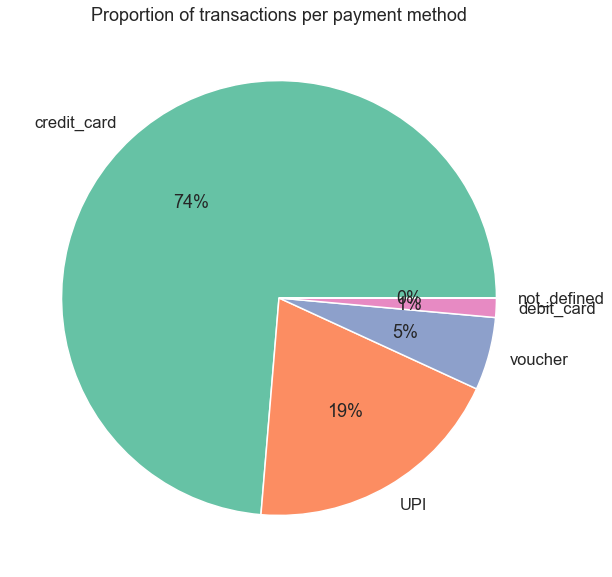

In [76]:
plt.figure(figsize=(10, 10))
custom = sns.color_palette('Set2')
ax = plt.pie(x=train.payment_type.value_counts(),
             labels=train.payment_type.value_counts().index,
             autopct='%0.f%%',
             colors=custom)
plt.title('Proportion of transactions per payment method')
plt.show()

# 5. Customer satisfaction towards category & product

In [77]:
# a.Which categories (top 10) are maximum rated & minimum rated?

In [78]:
print(
    'Highest Rated Product Categories\n\n',
    pd.pivot_table(data=train,
                   index='product_category_name',
                   values='review_score',
                   aggfunc='mean').sort_values(by='review_score',
                                               ascending=False).head(10))
print(
    '\n\nLowest Rated Product Categories\n\n',
    pd.pivot_table(data=train,
                   index='product_category_name',
                   values='review_score',
                   aggfunc='mean').sort_values(by='review_score',
                                               ascending=False).tail(10))

Highest Rated Product Categories

                                        review_score
product_category_name                              
Cds_Dvds_Musicals                          4.642857
Fashion_Childrens_Clothes                  4.500000
Books_General_Interest                     4.431858
Books_Imported                             4.419355
Books_Technical                            4.345588
Costruction_Tools_Tools                    4.333333
Small_Appliances_Home_Oven_And_Coffee      4.320513
Food_Drink                                 4.312715
Luggage_Accessories                        4.290628
Fashion_Sport                              4.258065


Lowest Rated Product Categories

                                    review_score
product_category_name                          
Audio                                  3.824147
Furniture_Mattress_And_Upholstery      3.804878
Fashio_Female_Clothing                 3.780000
Fixed_Telephony                        3.661765
Fashion_Male_Clot

In [79]:
# b.Which products (top10) are maximum rated & minimum rated?

In [80]:
print(
    'Highest Rated Products\n\n',
    pd.pivot_table(data=train,
                   index='product_id',
                   values='review_score',
                   aggfunc='mean').sort_values(by='review_score',
                                               ascending=False).head(10))

print(
    '\n\nLowest Rated Products\n\n',
    pd.pivot_table(data=train,
                   index='product_id',
                   values='review_score',
                   aggfunc='mean').sort_values(by='review_score',
                                               ascending=False).head(10))

Highest Rated Products

                                   review_score
product_id                                    
00066f42aeeb9f3007548bb9d3f33c38           5.0
5f728acb77ac6cfbe96f6c64d2bd4694           5.0
5f2ad53b751662e4c54dceffadb3804d           5.0
5f2bbb2425de4f4853839fd12fc87d6e           5.0
c5dfa757c5ae7662e178e990e39362e0           5.0
5f30303a0e011f4746c76054639a2afb           5.0
5f348c2c79eb5d1eea867e7903fce1ee           5.0
5f39447057f5cc7964f30ec06ebf73a1           5.0
5f3a6b9196dde7e3702ec07bbdd34fab           5.0
5f3e86b7e537b8d2d993596c969b69a6           5.0


Lowest Rated Products

                                   review_score
product_id                                    
00066f42aeeb9f3007548bb9d3f33c38           5.0
5f728acb77ac6cfbe96f6c64d2bd4694           5.0
5f2ad53b751662e4c54dceffadb3804d           5.0
5f2bbb2425de4f4853839fd12fc87d6e           5.0
c5dfa757c5ae7662e178e990e39362e0           5.0
5f30303a0e011f4746c76054639a2afb           5.0
5f348c2c7

**c.Average rating by location, seller, product, category, month etc**


In [81]:
# Average Rating by State
pd.pivot_table(data=train,
               index='customer_state',
               values='review_score',
               aggfunc='mean').sort_values(by='review_score', ascending=False)

,review_score
customer_state,
Goa,4.800000
Punjab,4.150579
Uttar Pradesh,4.119529
Tamil Nadu,4.100121
Rajasthan,4.091793
Haryana,4.087087
Orissa,4.079886
Maharashtra,4.072222
Kerala,4.034560


In [82]:
# Average Rating by City

In [83]:
pd.pivot_table(data=train,
               index='customer_city',
               values='review_score',
               aggfunc='mean').sort_values(by='review_score', ascending=False)

,review_score
customer_city,
Bharthana,5.0
Chamoli Gopeshwar,5.0
Tiruppur,5.0
Fariha,5.0
Kollankodu,5.0
...,...
Khandapada,1.0
Sahapur,1.0
Velur,1.0


In [84]:
# Average Rating by Catgeory

In [85]:
pd.pivot_table(data=train,
               index='product_category_name',
               values='review_score',
               aggfunc='mean').sort_values(by='review_score', ascending=False)

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.431858
Books_Imported,4.419355
Books_Technical,4.345588
...,...
Office_Furniture,3.516779
Home_Comfort_2,3.387097
Diapers_And_Hygiene,3.256410


In [86]:
# Average Rating by Month

In [87]:
pd.pivot_table(data=train,
               index='Month_of_Purchase',
               values='review_score',
               aggfunc='mean')

,review_score
Month_of_Purchase,
2016-09(September),1.000000
2016-10(October),3.485075
2016-12(December),5.000000
2017-01(January),4.066667
2017-02(February),3.983043
2017-03(March),4.020352
2017-04(April),3.951703
2017-05(May),4.097436
2017-06(June),4.100701
